# Confidence Intervals and Numpy

In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import NormalDist
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels

In [26]:
#read in the automobile data
automobile_data = pd.read_csv('C:/Users/taiku/Documents/automobile_data_processed.csv')

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
137,14.0,8,302.0,140,4638,16.0,45
9,15.0,8,390.0,190,3850,8.5,49
33,16.0,6,225.0,105,3439,15.5,48
244,32.8,4,78.0,52,1985,19.4,41
266,27.2,4,119.0,97,2300,14.7,41


In [27]:
automobile_data.shape

(392, 7)

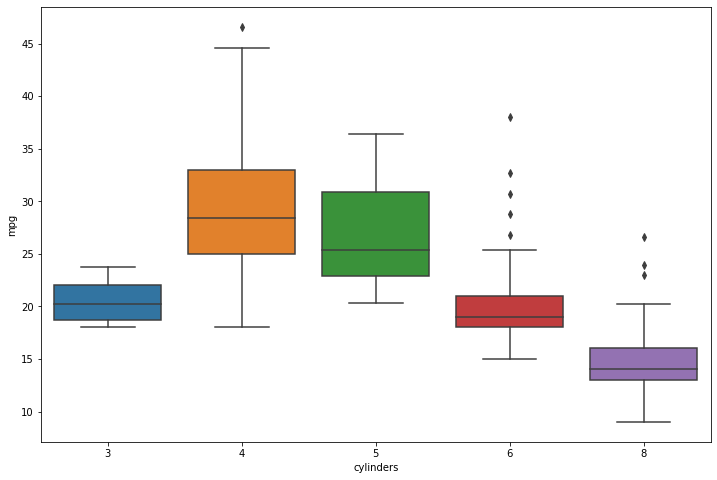

In [28]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='cylinders', y='mpg', data=automobile_data)

plt.show()

In [29]:
#use groupby to set up a table to create all the stats needed for each cylinder we wish to study

cylinder_stats = automobile_data.groupby(['cylinders'])['mpg'].agg(['mean', 'count', 'std'])

cylinder_stats

,mean,count,std
cylinders,,,
3,20.550000,4,2.564501
4,29.283920,199,5.670546
5,27.366667,3,8.228204
6,19.973494,83,3.828809
8,14.963107,103,2.836284


In [30]:
#prepare the array of confidence intervals for each 

ci_top = []
ci_bottom = []

#set up the stats we need for this
cylinder_stats = automobile_data.groupby(['cylinders'])['mpg'].agg(['mean', 'count', 'std'])
    
for i in cylinder_stats.index:
    
    mean, count, std = cylinder_stats.loc[i]
    
    ci_top.append(mean + 1.96 * (std / math.sqrt(count)))
    ci_bottom.append(mean - 1.96 * (std / math.sqrt(count)))

cylinder_stats['ci_top'] = ci_top
cylinder_stats['ci_bottom'] = ci_bottom

cylinder_stats

,mean,count,std,ci_top,ci_bottom
cylinders,,,,,
3,20.550000,4,2.564501,23.063211,18.036789
4,29.283920,199,5.670546,30.071789,28.496050
5,27.366667,3,8.228204,36.677755,18.055578
6,19.973494,83,3.828809,20.797216,19.149772
8,14.963107,103,2.836284,15.510863,14.415351


In [31]:
#setup a general function to output a confidence interval based on a chosen z_score

def confidence_interval(data, z_value):
    z_score = NormalDist().inv_cdf((1 + z_value) / 2.)   #this gets the z_score using the stats library
  
    ci_up = (data.mean() + z_score * (data.std() / math.sqrt(data.count())))
    ci_down = (data.mean() - z_score * (data.std() / math.sqrt(data.count())))
    
    return ci_up, ci_down

# Scipy Examples via Numpy

In [34]:
#upload data and check it out
salary_data = pd.read_csv('C:/Users/taiku/Documents/Salary_Data.csv')

salary_data.sample(10)

,YearsExperience,Salary
16,4.0,55794.0
19,4.5,61111.0
4,2.2,39891.0
10,3.0,60150.0
5,2.3,40200.0
29,8.3,101302.0
20,4.9,67938.0
11,3.0,60150.0
21,5.1,66029.0
9,3.0,60150.0


In [35]:
#check the number of rows and columns of the data
print("Shape ",salary_data.shape)

#print the number of nulls per column
print("\nNulls and Type:")
print(salary_data.isnull().sum())
print()

#create a function to use the numpy stats
def stats_output(data):
    for x in salary_data:
        print(x, "Min: ", np.min(data[x]))
        print(x, "Max: ", np.max(data[x]))
        print(x, "Range: ", np.ptp(data[x]))
        print(x, "Mean: ", np.mean(data[x]))
        print(x, "Median: ", np.median(data[x]))
        
        
#run the function
stats_output(salary_data)

Shape  (37, 2)

Nulls and Type:
YearsExperience    0
Salary             0
dtype: int64

YearsExperience Min:  1.1
YearsExperience Max:  10.5
YearsExperience Range:  9.4
YearsExperience Mean:  5.118918918918919
YearsExperience Median:  4.1
Salary Min:  37731.0
Salary Max:  122391.0
Salary Range:  84660.0
Salary Mean:  74117.4054054054
Salary Median:  63218.0
